In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Introduction to neural network classification with tensorflow 

Types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=2000

# Create circles
X,y=make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
X.size,y.size

(4000, 2000)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8, random_state=42)

In [5]:
X_train.size,y_train.size

(3200, 1600)

In [6]:
# Check out the features 
X[:,0]

array([ 0.47109875, -0.61696058, -0.3999557 , ...,  0.62826832,
       -0.78365851,  0.58442953])

In [7]:
# Check out the labels 
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [8]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
...,...,...,...
1995,0.568918,0.583759,1
1996,-0.222517,0.756905,1
1997,0.628268,-0.739106,0
1998,-0.783659,0.163585,1


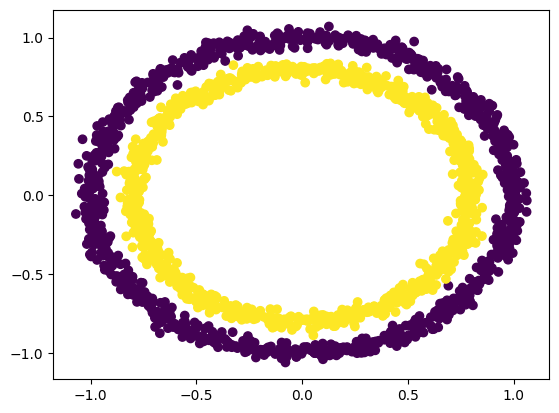

In [9]:
# visualize with a plot
plt.scatter(X[:,0],X[:,1],c=y)

## Input and output shapes 

In [10]:
X.shape, y.shape

((2000, 2), (2000,))

## Steps in modelling

In [11]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([#,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(10),#,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1)#activation=tf.keras.activations.softmax)
])


# Compile model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


In [12]:
# fit model
model.fit(X,y,epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 4ms/step - loss: 0.5977 - mae: 0.5977
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 0.5004 - mae: 0.5004
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5006 - mae: 0.5006
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5004 - mae: 0.5004
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5007 - mae: 0.5007
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 9/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5008 - mae: 0.5008
Epoch 10/100
63/63 [==============================] - 0s 4ms/step - loss: 0.5005 - mae: 0.5005
Epoch 11/100
63/63 [==============================] - 0s 4m

To visualize our model's predictions, create a function plot_decision_boundary(), this function will:
* Take in a trained model, features(X) and labels(y)
* Create a mesh grid of the different X values 
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [13]:


def plot_decision_boundary(model, X,y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min,  x_max=X[:,0].min()- 0.1, X[:,0].max()+0.1
    y_min,  y_max=X[:,1].min()- 0.1, X[:,1].max()+0.1
    
    xx, yy=  np.meshgrid(np.linspace(x_min,x_max,100),
                         np.linspace(y_min,y_max,100)
                         )
    
    # Create X value (we're going to make predictions on these)
    
    x_in=np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred=model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0])> 1:
        print("doing multiclass classification")
        y_pred=np.argmax(y_pred,axis=1)
    else:
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu) 
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())   
   

doing binary classification


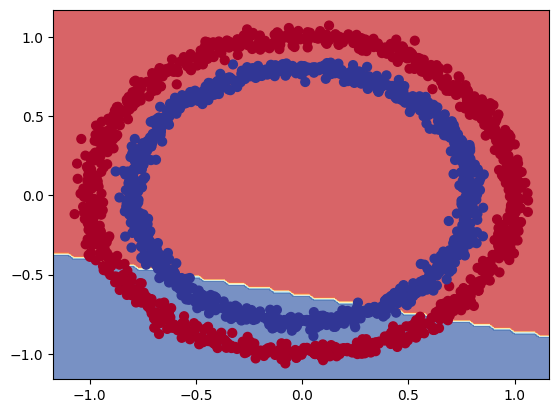

In [14]:
# Check out the predictions our model is making

plot_decision_boundary(model=model,
                       X=X,
                       y=y)

In [15]:
tf.random.set_seed(42)

x_regression=np.arange(0,1000,5)
y_regression=np.arange(100,1100,5)

# split data 
X_reg_train=x_regression[:150]
X_reg_test=x_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


In [16]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([#,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(10),#,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1)#activation=tf.keras.activations.softmax)
])


# Compile model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


In [17]:
# fit model
model.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 329.5071 - mae: 329.5071
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 316.4532 - mae: 316.4532
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 303.9292 - mae: 303.9292
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 291.1327 - mae: 291.1327
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 278.1811 - mae: 278.1811
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 264.7294 - mae: 264.7294
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 251.4003 - mae: 251.4003
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 238.1612 - mae: 238.1612
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 225.0844 - mae: 225.0844
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 211.4227 - mae: 211.4227
Epoch 11/100
5/5 [=====================

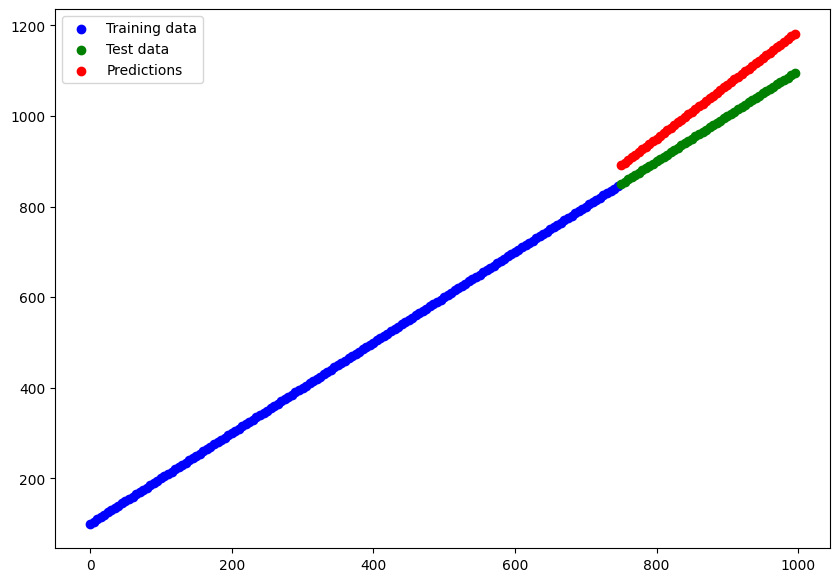

In [18]:
# Make predictions with our  trained model 
y_reg_preds=model.predict(X_reg_test)

# Plot predictions

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")

plt.legend()

## Non-linearity

In [19]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


# Compile model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [20]:
# fit model
history=model.fit(X_train,y_train,epochs=60)

Epoch 1/60
50/50 [==============================] - 1s 5ms/step - loss: 0.6868 - accuracy: 0.5081
Epoch 2/60
50/50 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.5263
Epoch 3/60
50/50 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.5337
Epoch 4/60
50/50 [==============================] - 0s 5ms/step - loss: 0.6782 - accuracy: 0.5437
Epoch 5/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5469
Epoch 6/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5475
Epoch 7/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.5525
Epoch 8/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5537
Epoch 9/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.5587
Epoch 10/60
50/50 [==============================] - 0s 5ms/step - loss: 0.6717 - accuracy: 0.5531
Epoch 11/60
50/50 [

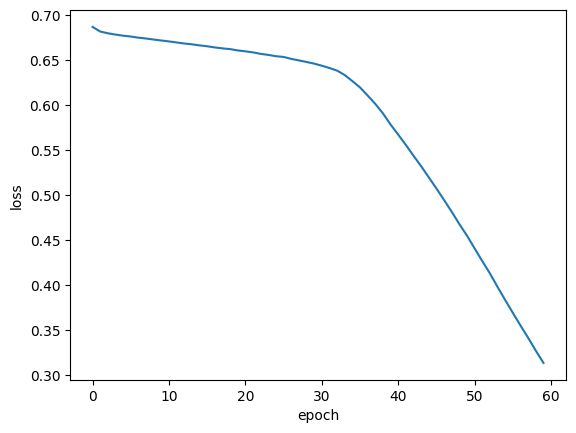

In [21]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

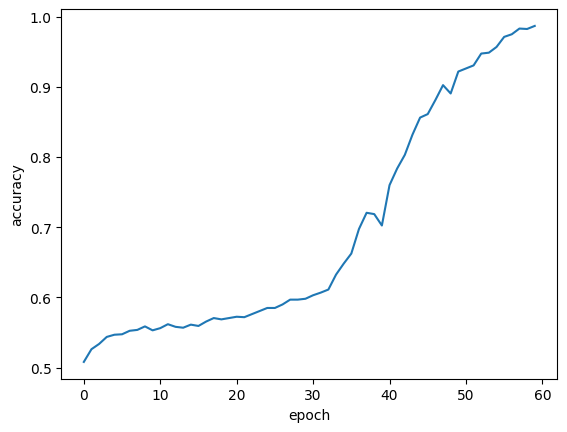

In [22]:
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [23]:
y_preds=model.predict(X_test)

In [24]:
X_train.shape,y_train.shape

((1600, 2), (1600,))

In [25]:
# # Plot predictions

# plt.figure(figsize=(10,7))
# plt.scatter(X_train,y_train,c="b",label="Training data")
# plt.scatter(X_test,y_test,c="g",label="Test data")
# plt.scatter(X_test,y_preds,c="r",label="Predictions")

# plt.legend()

doing binary classification


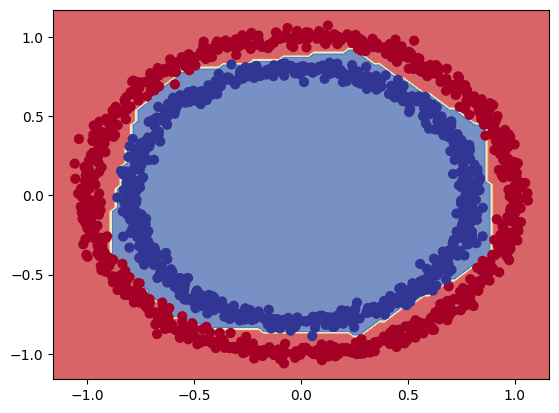

In [26]:
plot_decision_boundary(model,X_train,y_train)

 ## Finding the best learning rate

In [27]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


# Compile model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [28]:
# fit the model 

history=model.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 0.6899 - accuracy: 0.5031 - lr: 1.0000e-04
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5044 - lr: 1.1220e-04
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.5069 - lr: 1.2589e-04
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5094 - lr: 1.4125e-04
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.5106 - lr: 1.7783e-04
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6836 - accuracy: 0.5206 - lr: 1.9953e-04
Epoch 8/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.5375 - lr: 2.2387e-04
Epoch 9/100
50/50 [==============================] - 0s 8ms/step - loss:

<AxesSubplot: xlabel='epochs'>

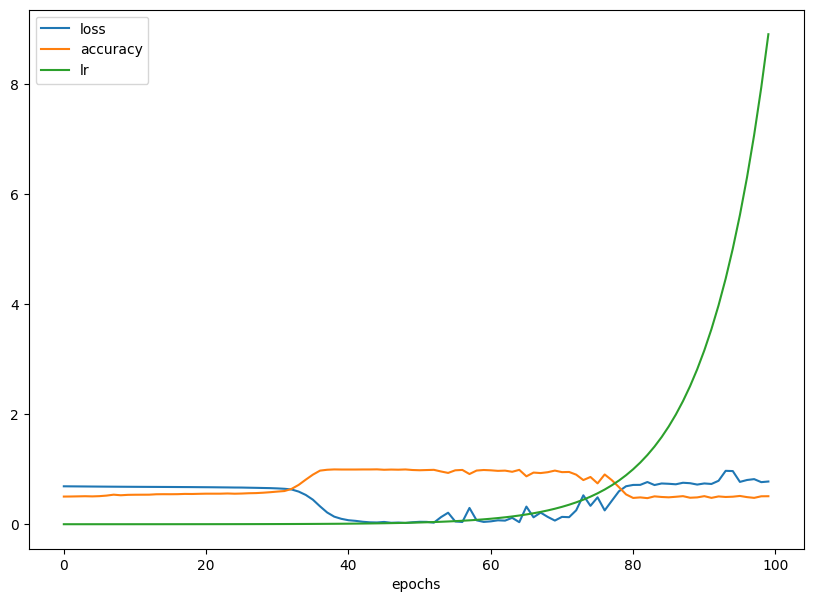

In [29]:
# checout the history 

pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

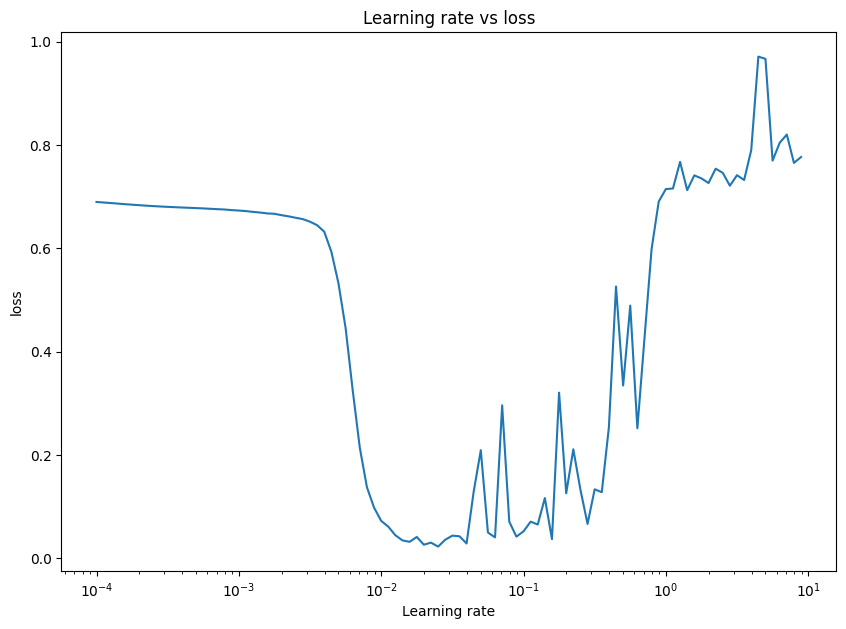

In [30]:
# Plot the learning rate vs loss

lrs= 1e-4* (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

In [31]:
tf.random.set_seed(42)


# Build model

model = tf.keras.models.Sequential([
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])


# Compile model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [32]:
history=model.fit(X_train,
                    y_train,
                    epochs=20,
                    )

Epoch 1/20
50/50 [==============================] - 1s 4ms/step - loss: 0.6786 - accuracy: 0.5550
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6606
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.5835 - accuracy: 0.7119
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8369
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 0.2291 - accuracy: 0.9706
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.9837
Epoch 7/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0738 - accuracy: 0.9931
Epoch 8/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0523 - accuracy: 0.9950
Epoch 9/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9937
Epoch 10/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9962
Epoch 11/20
50/50 [

doing binary classification
doing binary classification


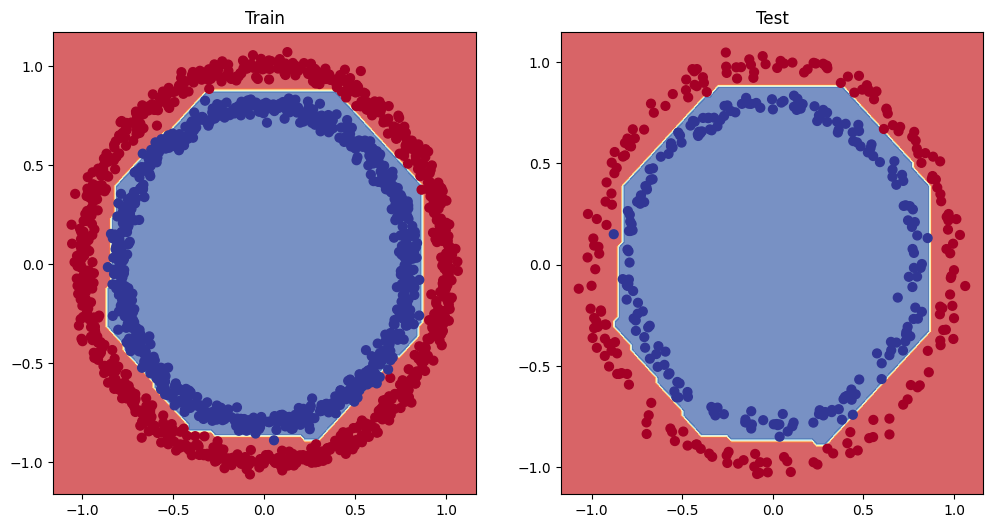

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)
plt.show()

## More classification evalution methods

1. accuracy
2. precision
3. recall 
4. f1-score
5. confusion matrix


In [34]:
# check accuracy of our model 
loss, accuracy  = model.evaluate(X_test,y_test)
print(f"Model loss on test: {loss}")
print(f"Model accuracy on test: {(accuracy*100):.2f}%")


13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9975
Model loss on test: 0.023065702989697456
Model accuracy on test: 99.75%


### confusion matrix

In [35]:
# create confusion matrix 

from sklearn.metrics import confusion_matrix

# make predictions 
y_preds= model.predict(X_test)

# create 

confusion_matrix(y_test,tf.round(y_preds))

array([[197,   0],
       [  1, 202]], dtype=int64)

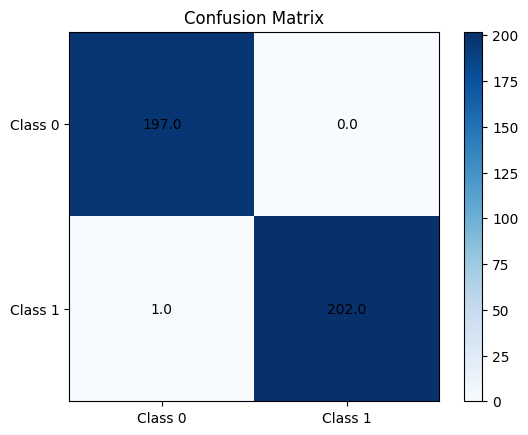

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the true labels and predicted labels
y_true = y_test
y_pred = np.asarray(tf.round(y_preds),dtype="int32")

# Define the classes
classes = ['Class 0', 'Class 1']

# Create the confusion matrix
confusion_matrix = np.zeros((2, 2))
for i in range(len(y_true)):
    confusion_matrix[y_true[i]][y_pred[i]] += 1

# Define the figure and axis
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# Add the labels to the axis
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Add the values to the cells
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, confusion_matrix[i][j], ha='center', va='center', color='black')

# Add a title
ax.set_title("Confusion Matrix")

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()


## Working with a larger example (multiclass classification)

In [37]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and testing 

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [38]:
# Show the first train example 

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [39]:
# Check the shape of a single example 

train_data[0].shape,train_labels[0].shape

((28, 28), ())

Text(0.5, 1.0, '9')

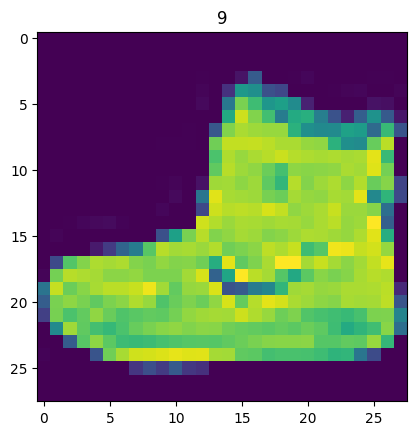

In [40]:
# Plot a sample
plt.imshow(train_data[0])
plt.title(train_labels[0])

In [41]:
# Create a small list so we can index to our labels

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',    'Sandal','Shirt','Sneaker','Bag','Ankle boot']


Text(0.5, 1.0, 'Shirt')

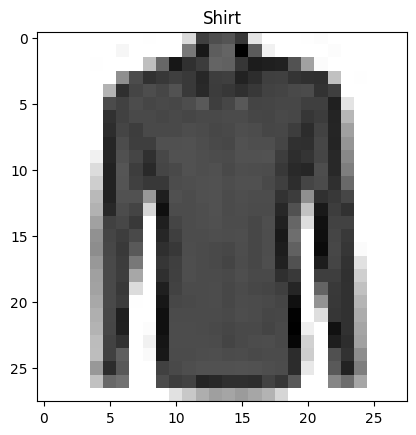

In [42]:
# Plot an exaple img 

plt.imshow(train_data[40], cmap=plt.cm.binary)
plt.title(class_names[train_labels[40]])

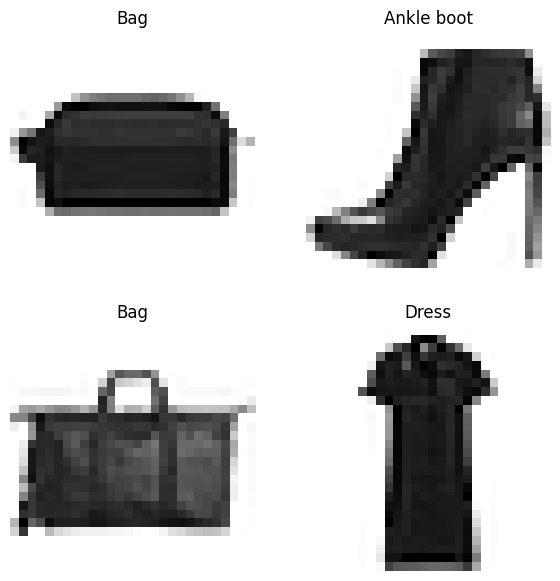

In [43]:
# Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

In [44]:
# Preprocess the data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [45]:
tf.random.set_seed(42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Create the learning rate callback 

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# Train the model
history= model.fit(train_data, train_labels, epochs=30,validation_data=(test_data, test_labels),callbacks=[lr_scheduler])

Epoch 1/30


C:\Users\Ahmed Medhat\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 9s 4ms/step - loss: 0.4958 - accuracy: 0.8260 - val_loss: 0.4185 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3772 - accuracy: 0.8640 - val_loss: 0.4478 - val_accuracy: 0.8464 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3417 - accuracy: 0.8745 - val_loss: 0.3857 - val_accuracy: 0.8554 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3220 - accuracy: 0.8831 - val_loss: 0.3923 - val_accuracy: 0.8610 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3079 - accuracy: 0.8860 - val_loss: 0.3728 - val_accuracy: 0.8659 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2978 - accuracy: 0.8888 - val_loss: 0.3894 - val_accuracy: 0.8568 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step -

Text(0.5, 1.0, 'Finding the ideal learning rate')

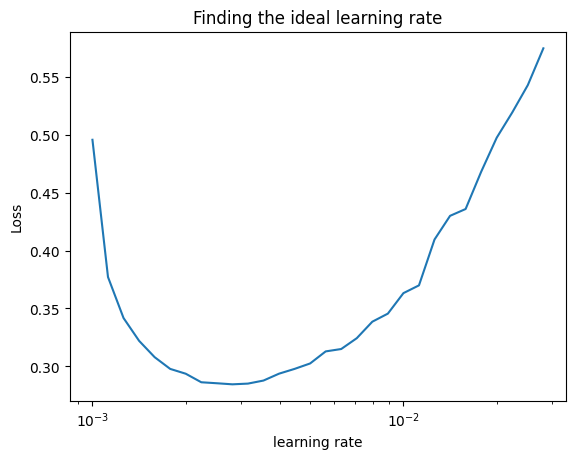

In [46]:
# Plot the learning rate decay curve 
import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3 * (10**(tf.range(30)/20))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

<AxesSubplot: title={'center': 'training'}>

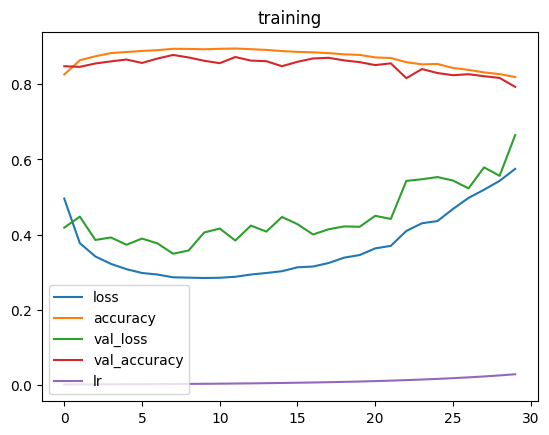

In [47]:
# Plot history 
pd.DataFrame(history.history).plot(title="training")

In [49]:
tf.random.set_seed(42)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



# Train the model
history= model.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10


C:\Users\Ahmed Medhat\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4949 - accuracy: 0.8260 - val_loss: 0.4167 - val_accuracy: 0.8493
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3737 - accuracy: 0.8655 - val_loss: 0.4499 - val_accuracy: 0.8459
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3351 - accuracy: 0.8778 - val_loss: 0.3818 - val_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.8875 - val_loss: 0.3737 - val_accuracy: 0.8633
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.8914 - val_loss: 0.3633 - val_accuracy: 0.8715
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2787 - accuracy: 0.8969 - val_loss: 0.3843 - val_accuracy: 0.8570
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.9001 - val_loss: 0.3503 - val_accuracy: 0.8753
Epo

<AxesSubplot: title={'center': 'training'}>

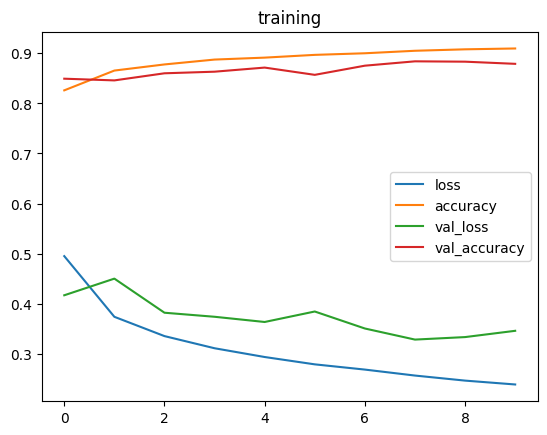

In [50]:
# Plot history 
pd.DataFrame(history.history).plot(title="training")

In [71]:
y_preds=model.predict(test_data)

for i in range(len(y_preds)):
    y_pred.append(np.argmax(y_preds[i]))
    
    
y_pred=np.asarray(y_pred)    

In [75]:
y_pred.shape,test_labels.shape

((10000,), (10000,))

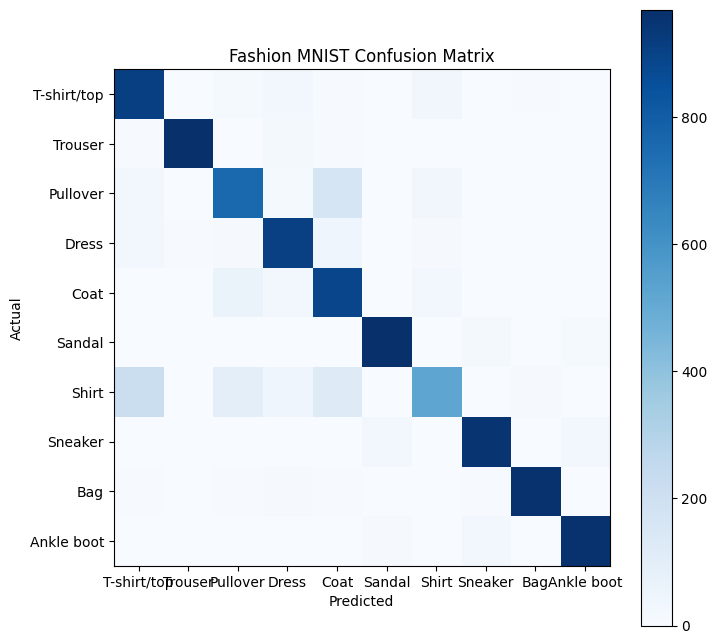

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap='Blues')
plt.title('Fashion MNIST Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.yticks(tick_marks, ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
import random 

def plot_random_image(model,images,true_labels,classes):
    
    # Setup random int
    i=random.randint(0,len(images))
    
    # Create predictions and targets
    target_image=images[i]
    pred_probs=model.predict(target_image.reshape(1,28,28))
    pred_label=classes[pred_probs.argmax()]
    true_label=classes[true_labels[i]]
     
    # Plot image
    plt.imshow(target_image,cmap=plt.cm.binary)
    
    # Change the color of the titles
    if pred_label==true_label:
        color="green"
    else:
        color="red"     
     
    # Add xlabel information ( prediction/true label)
    
    plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
               color=color)

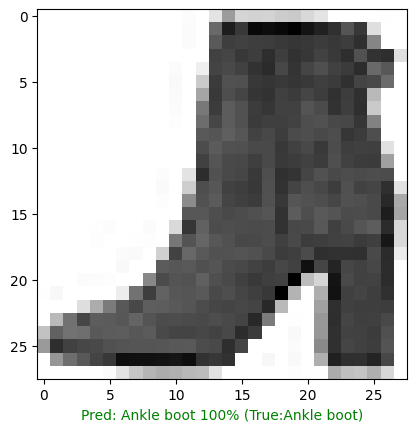

In [87]:
# Check pred

plot_random_image(model=model,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning

In [88]:
model.layers

In [94]:
# Get the patterns of nn 

weights ,biases = model.layers[1].get_weights()

weights, weights.shape

(array([[-0.03982681, -0.00956997,  0.2693881 , ...,  0.01502256,
          0.38741043, -0.00194794],
        [ 0.00845768, -0.01156645,  0.07044792, ...,  0.15869717,
         -0.0967576 ,  0.016822  ],
        [ 0.06294508,  0.07472323,  0.01128809, ...,  0.04070363,
         -0.32575902, -0.30066767],
        ...,
        [ 0.20489205,  0.17951672, -0.08797294, ...,  0.13187495,
         -0.51374257, -0.06197955],
        [ 0.02863052, -0.17792182,  0.00395941, ..., -0.01564364,
         -0.29830933, -0.00841372],
        [-0.11981197, -0.16737063, -0.07689986, ..., -0.1061267 ,
         -0.19394399, -0.00267864]], dtype=float32),
 (784, 128))

In [95]:
# bias and biases shapes

biases,biases.shape

(array([ 0.28341106,  0.19451493,  0.1816251 ,  0.33997074,  0.15750083,
         0.36469483,  0.11524763,  0.45319366,  0.07695471,  0.25757602,
         0.1615281 ,  0.5003367 , -0.02527114,  0.728441  ,  0.3383659 ,
        -0.03362008,  0.339756  ,  0.00376275,  0.208149  ,  0.2621648 ,
        -0.33381763, -0.42775258,  0.09918187,  0.09866372, -0.09335671,
         0.46433324,  0.55166984,  0.18008257,  0.5045161 , -0.2957635 ,
        -0.02199492,  0.6067634 ,  0.4094594 , -0.01779965,  0.19011566,
        -0.21667036,  0.3372799 ,  0.5126193 ,  0.26560184, -0.14312364,
         0.45842016,  0.587519  ,  0.1483848 , -0.00849333,  0.37573764,
        -0.12818398,  0.4509124 ,  0.36692047,  0.13844706,  0.34701633,
         0.7907479 , -0.01499486,  0.26752642,  0.02915094,  0.25456303,
         0.17207532, -0.02060646,  0.4373087 ,  0.4173164 ,  0.0896995 ,
        -0.01808126,  0.2260487 ,  0.19560565,  0.33587667, -0.4219515 ,
         0.19516972,  0.23591742, -0.11942949, -0.1

Every neuron has a bias vector. each of these are paired with weights matrix

The bias vector get initialized as zeros(at least in the case of a Tensorflow Dense Layer).

The bias vector dictates how much the patterns  within the corresponding weights matrix should influence the next layer

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)